# Deploying Machine Learning Models Using Flask
In this assignment we are going to work on deploying and serving a simple keras model. We are going to start with training the model, which is something that we should be very comfortable with by now. We will take this model and export it for future use. Then we will write a Flask application to load this model and serve it to mutiple users over the internet. We will have the chance to showcase our models to the whole world!

Most of the difficulty in this example is understanding how Flask works. If you don't know about Flask, do not worry. We will take go through a few example setups step by step. There are many other frameworks that are similar to Flask, like Django or Tornado. All of these frameworks can be used for the same purpose, but we are going use Flask for the assignment.

If you haven't done it yet, install Flask using "pip install Flask" on your terminal and then please take a look at http://flask.pocoo.org/docs/0.12/quickstart/ We will present a few short examples here for you and you should use the Flask documentation when you want to find more examples and to see the APIs. 

Ok, here is a minimal Flask program:

In [28]:
from flask import Flask
app = Flask(__name__)

@app.route('/')
def hello_world():
    return 'Hello, World!'

When we run this program on our local computer, it will start a webserver, hosted on our local machine. We can
open up our favorite web-browser and type http://127.0.0.1:5000/ at the address bar to see a "Hello World" message.
If you are able to see this message, you have setup a Flask server successfully and ready to take on the next
challenge!!!


Let's look at a second example.


In [29]:
from flask import Flask
app = Flask(__name__)

@app.route('/')
def index():
    return 'Index Page'

@app.route('/hello_route')
def hello_function():
    return 'Hello, World'

When we run this code Flask will start a webserver for us like what we've seen in the first example. If we go to
the website http://127.0.0.1:5000/ we will see a message "Index Page". If we however go to the page
http://127.0.0.1:5000/hello_route, we will see a "Hello, World" message. What is happening under the
hood is that Flask is taking the hello_route requests, and routing that to the hello_function function
in our code. This function returns a message which then gets displayed on our page! This is how we tie
the webpage requests to python code. We define the route using "@app.route('/hello_route')" and then
write function that we would like run in response to this request.

# Training a Neural Network on Iris Dataset

We will use the Iris dataset in this homework. The training of the network should be an easy process for all of us at this point. Our main goal in this assignment is not the training itself, but being able to export the model and serve it through a server. So a training goal of 85% accuracy is good enough. If you get better than that, that's great!

Go ahead and download the dataset from the UCI repository given here: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data The extension of the dataset is given as '.data' but you can change that to be a 'csv' standing for comma separated file. The attributes in this dataset are given as:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica
    
As you can see, the last column is the class labels. You need to make sure to drop that column from your training, and you also need to one-hot-encode that column before you could use it as your labels. 

In [30]:
# Load the iris dataset and return the tuple X,Y such that X holds the four attributes: sepal length, sepal width, petal length, 
# petal width and Y holds the one-hot-encoded class values e.g 0,0,1 for Iris Setosa, 0,1,0 for Iris Versicolour etc
import sklearn as sk
import pandas as pd
import numpy as np
from keras.utils import np_utils
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

def load_training_data():
    ######################### TODO #########################
    #df = pd.read_csv("data.csv")
    df = pd.read_csv("iris.csv")
    df.head()
    print(df.head())
    #print(df)
    #X = df.columns[0:4]
    #YY = df.columns[4:5] 
    dataset = df.values
    X = dataset[:,0:4].astype(float)
    YY = dataset[:,4]
    #print (X)
    #print(YY)
    
    encoder = LabelEncoder()
    encoder.fit(YY)
    encoded_Y = encoder.transform(YY)
    
    Y = np_utils.to_categorical(encoded_Y)
    print(Y.shape)
    #print(X)
    #print(Y)
    
    return (X,Y) 

In [31]:
X,Y = load_training_data()

   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa
(149, 3)


## Keras Model
Develop a Keras model that can classify the iris dataset. Using ReLu activations throughout the network and using a softmax at the top layer would help to get a good accuracy. Include the accuracy metric in your model so that you can plot it in the next cell. A very simple model, with 2 dense layers can get you to 90% accuracy, so if you find yourself builind a resnet here, there is something going wrong. 

In [32]:
import keras
from keras.models import Sequential
from keras.layers import Dense 

# Return your model after you compile it. 
# Include the accuracy metric in your model for later use.
def build_model():
    ######################## TODO ######################
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

(149, 4)
(149, 3)
dict_keys(['loss', 'acc', 'val_acc', 'val_loss'])


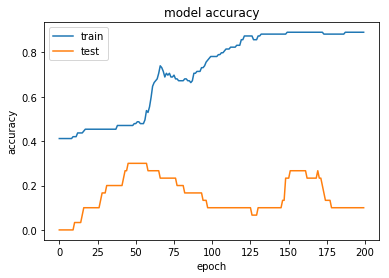

In [36]:
model = build_model()
print(X.shape)
print(Y.shape)
history = model.fit(X, Y, epochs=200, batch_size=50, validation_split = .2, verbose=0)

########################### TODO ###########################
# PLOT BOTH ACC and VAL_ACC to see if your model is performing well. It's very 
# easy to overfit to this dataset. 
# list all data in history
print(history.history.keys())
# summarize history for accuracy
from matplotlib import pyplot
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.show()
#pyplot.plot()
#pyplot.show()

In [37]:
# Lets save this model, and then delete it!
model.save('iris_model.h5')
del model  # deletes the existing model

# Serving our Model Through Flask

We are now going to tie the model we have trained to a Flask server!
## TODO
This part requires you to run the assignment on your local machine, so download the notebook and the model to your local box before moving ahead. 

In [38]:
# A litte bit of network related magic to give you an address that you could use for debugging your code. 
# This should output a uri that you could copy and past to your browser to see the results of your model.
# At this point, because we are not running the Flask service yet, you are going to get a response not found 
# error. 
import socket
s = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
s.connect(("8.8.8.8", 80))
hostname = s.getsockname()[0]
print("This is what you should be putting in the address bar: \n")
request = hostname + ":9001/predict?s_length=10&s_width=20&p_length=20&p_width=5"
print(request)
s.close()

This is what you should be putting in the address bar: 

172.31.29.207:9001/predict?s_length=10&s_width=20&p_length=20&p_width=5


In [ ]:
from flask import Flask, request, jsonify
app = Flask(__name__)
model = None

def load_iris_model():
    ###################### TODO ######################
    # load the pre-trained Keras model into the global model variable
    
    pass

@app.route("/predict")
def predict():
    global model

    ###################### TODO ######################
    # collect all the arguments passed into this request.
    # Take a look at the request.args
    s_length = ...
    s_width  = ...
    p_length = ...
    p_width  = ...
    print(s_length, s_width, p_length, p_width)
    
    # We will predict the class probabilities based on the input here
    query = np.array([[s_length, s_width, p_length, p_width]])
    preds = model.predict(query)

    ###################### TODO ######################
    data = {}
    data["success"] = False
    data["predictions"] = []
    data["predicted_class"] = ""
    
    # Prepare a JSON response and return it here 
    # The JSON file should have the following format:
    #    response = {
    #        "success": True,
    #        "predictions": {
    #            'class_label_1': probability_of_class_1, 
    #            'class_label_2': probability_of_class_2,
    #            'class_label_3': probability_of_class_3
    #        },
    #        "predicted_class": 'Iris Setosa'
    #    }
    
    response_html = """
            <!doctype html>
                <title>Hello from Iris Classifier</title>
                    {% if response %}
                      <h1>{{ response}}!</h1>
                    {% endif %}
    """
    return render_template_string(response_html, response=data)

if __name__ == "__main__":
    from werkzeug.serving import run_simple
    load_iris_model()
    run_simple('0.0.0.0', 9001, app)

 * Running on http://0.0.0.0:9001/ (Press CTRL+C to quit)
